# Connexion à MongoDB avec Python

In [ ]:
from pymongo import MongoClient

# Connexion au serveur MongoDB
client = MongoClient('mongodb://localhost:27017/')

# Vérif co
print("Connexion réussie à MongoDB")

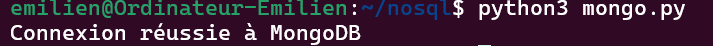

# Opérations CRUD de base avec PyMongo
## Création d’une base de données et d’une collection

In [ ]:
db = client["mydb"]

# Création d’une collection
collection = db["mycollection"]

print("Base de données et collection créées avec succès")
print(collection)

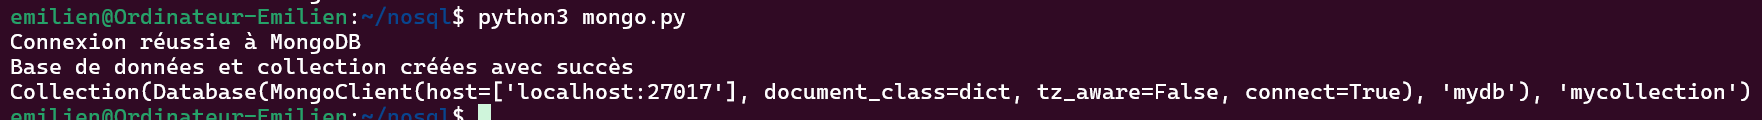

## Insérer des documents (Create)

In [ ]:
document = {
    "name": "John Doe",
    "email": "john.doe@example.com",
    "age": 30
}
result = collection.insert_one(document)
print("Document inséré avec l'ID:", result.inserted_id)

documents = [
    {"name": "Alice", "email": "alice@example.com", "age": 25},
    {"name": "Bob", "email": "bob@example.com", "age": 35}
]
result = collection.insert_many(documents)
print("Documents insérés avec les IDs:", result.inserted_ids)

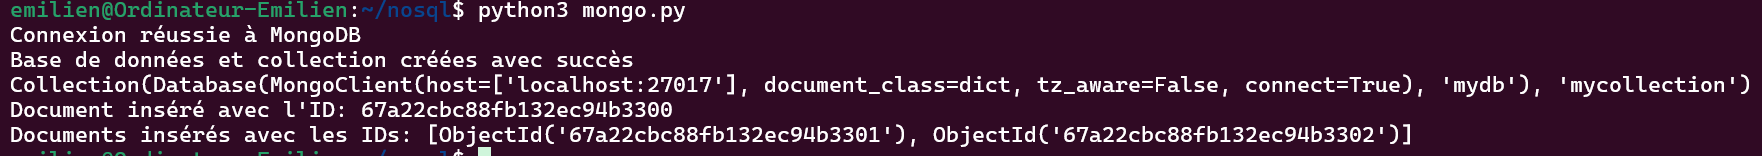

## Lire des documents (Read)

In [ ]:
query = {"name": "John Doe"}
document = collection.find_one(query)
print("Document trouvé:", document)

query = {"age": {"$gt": 25}}  # Sélectionne les personnes ayant plus de 25 ans
documents = collection.find(query)

for doc in documents:
    print(doc)

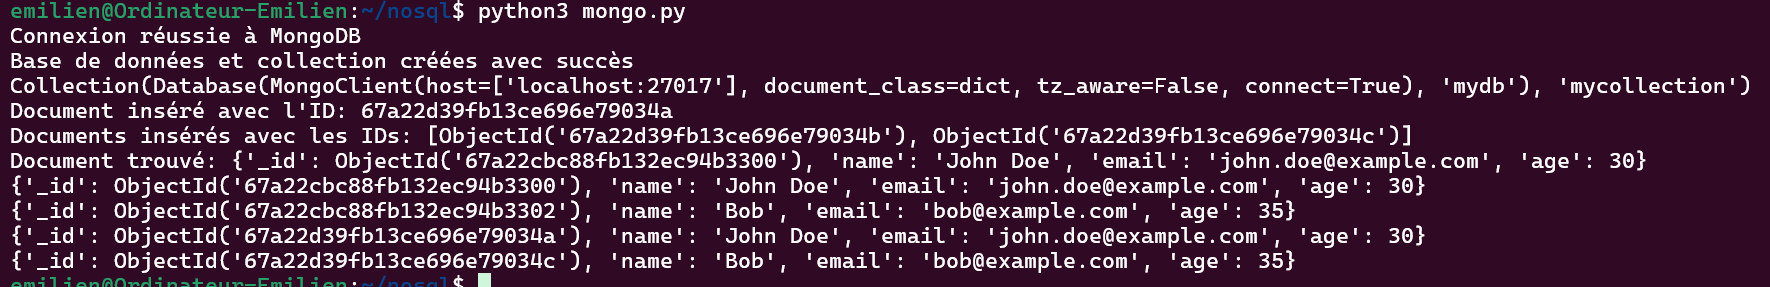

## Mettre à jour des documents (Update)

In [ ]:
query = {"name": "John Doe"}
update = {"$set": {"age": 31}}
result = collection.update_one(query, update)
print("Nombre de documents modifiés:", result.modified_count)

query = {"age": {"$gt": 25}}
update = {"$inc": {"age": 1}}  # Incrémente l'âge de 1
result = collection.update_many(query, update)
print("Nombre de documents modifiés:", result.modified_count)

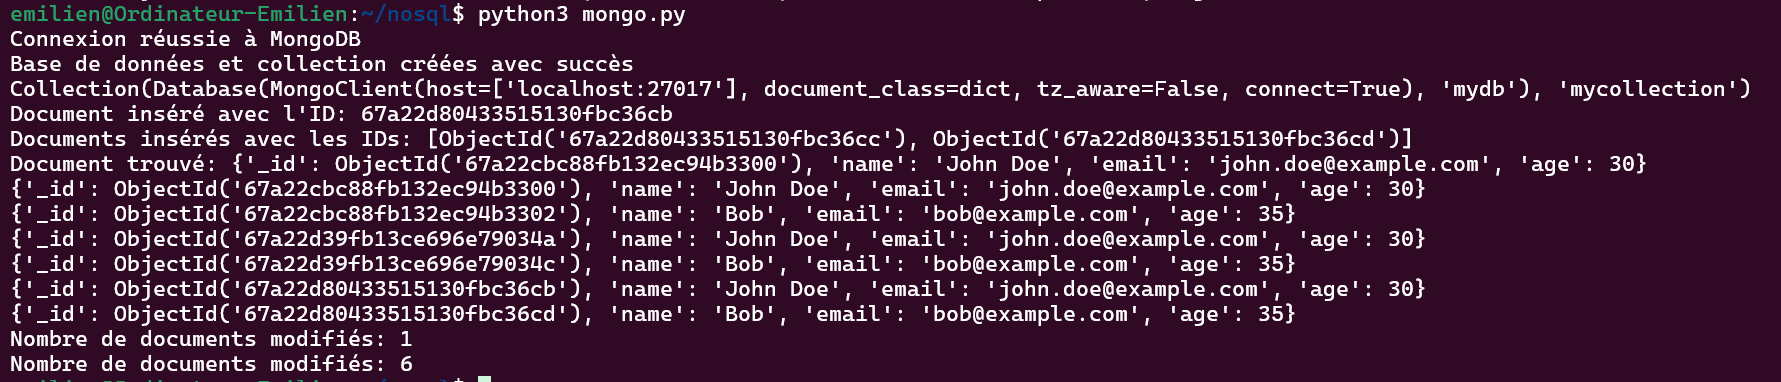

## Supprimer des documents (Delete)

In [ ]:
query = {"name": "John Doe"}
result = collection.delete_one(query)
print("Nombre de documents supprimés:", result.deleted_count)

query = {"age": {"$gt": 25}}
result = collection.delete_many(query)
print("Nombre de documents supprimés:", result.deleted_count)

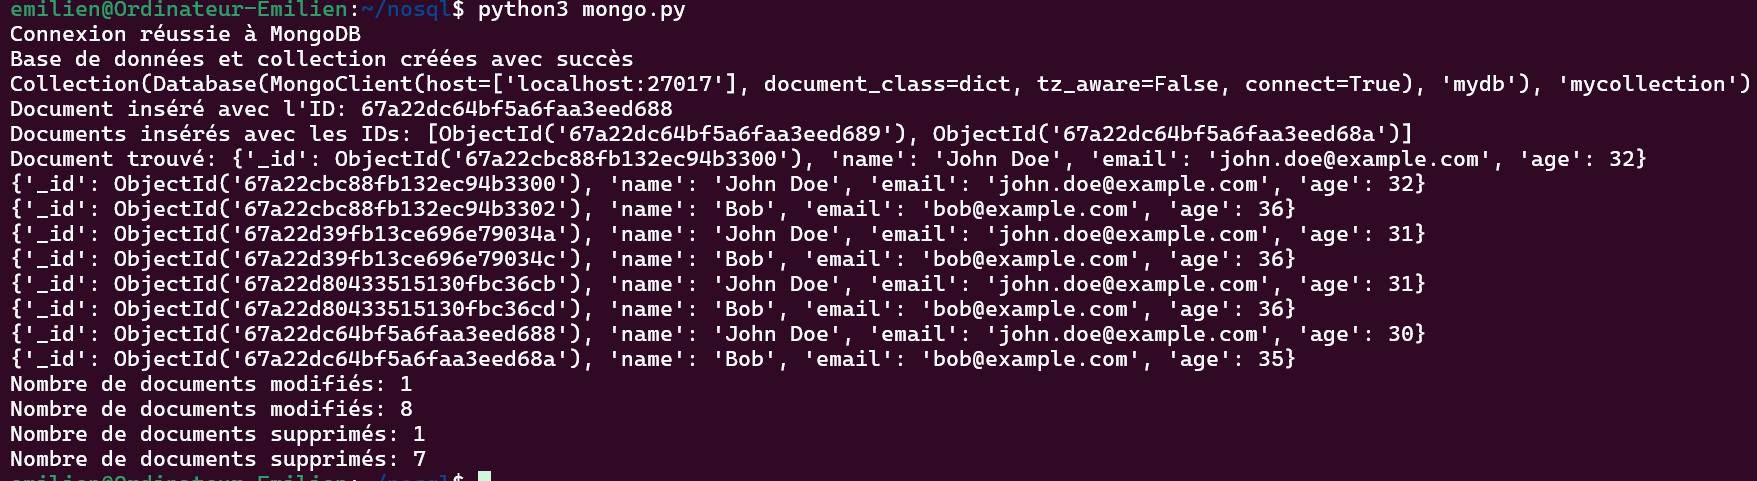

## Interrogation et filtrage des données

In [ ]:
query = {
    "$and": [
        {"age": {"$gt": 25}},
        {"email": {"$regex": "@example\.com$"}}
    ]
}
documents = collection.find(query)

for doc in documents:
    print(doc)

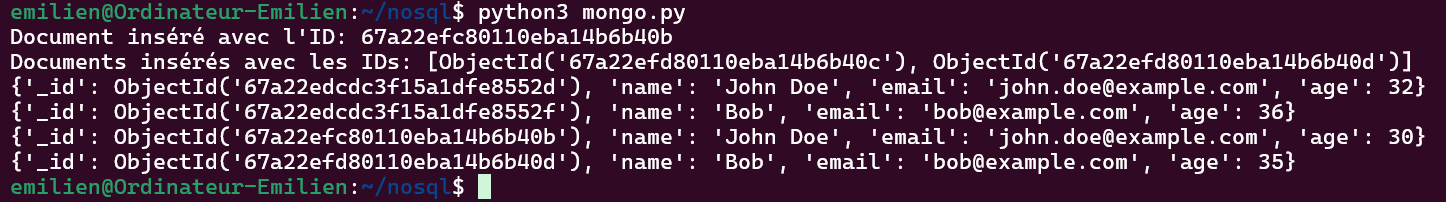

## Projection (Sélection des champs)

In [ ]:
query = {"age": {"$gt": 25}}
projection = {"_id": 0, "name": 1, "email": 1}
documents = collection.find(query, projection)

for doc in documents:
    print(doc)

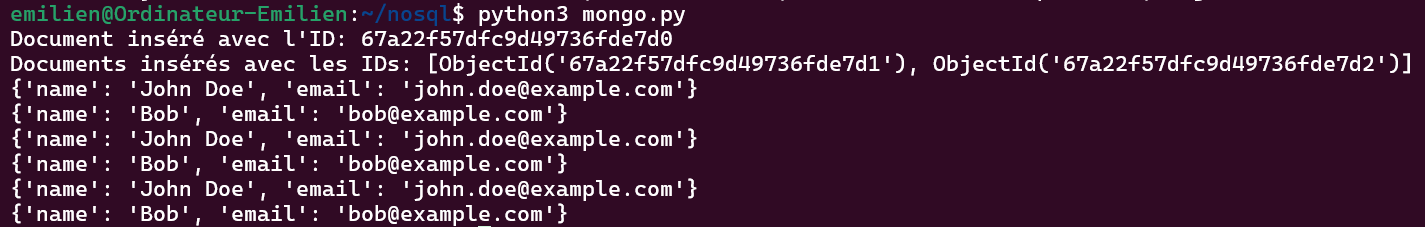

## Trier les résultats

In [ ]:
from pymongo import ASCENDING

query = {"age": {"$gt": 25}}
documents = collection.find(query).sort("name", ASCENDING)

for doc in documents:
    print(doc)

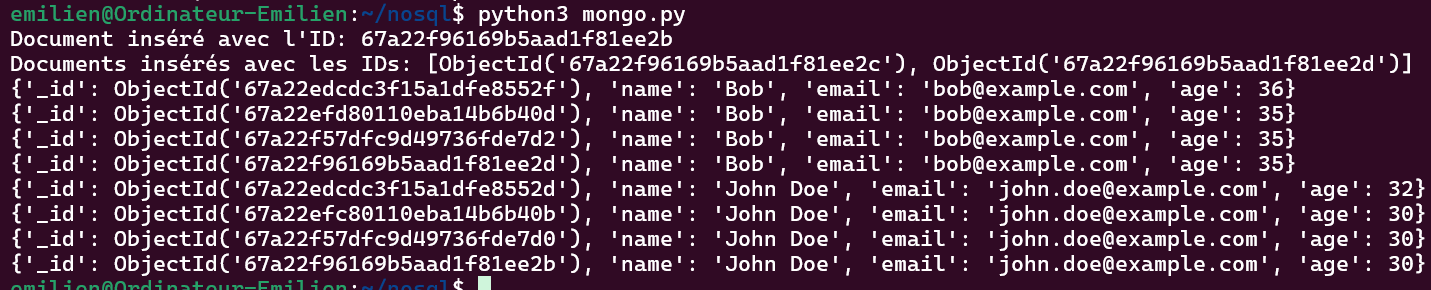

## Charger des données à partir d’un fichier JSON

In [ ]:
import json

with open("accounts.json", "r") as file:
    data = json.load(file)
    
result = collection.insert_many(data)
print("Données insérées avec les IDs:", result.inserted_ids)

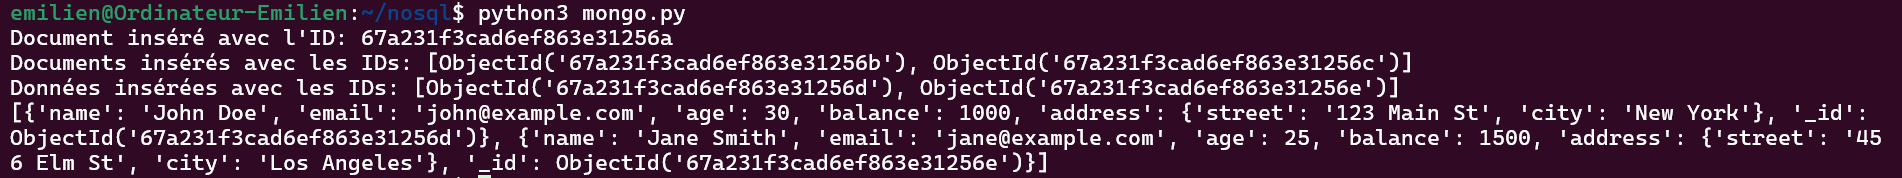

## Création d’un index

In [ ]:
collection.create_index("email", unique=True)
collection.create_index("address.city", name="city_index")

## Agrégation (Groupement et statistiques)

In [ ]:
# Mbr de solde par vile
pipeline = [
    {"$group": {"_id": "$address.city", "total_balance": {"$sum": "$balance"}}},
    {"$sort": {"total_balance": -1}}
]

results = collection.aggregate(pipeline)

for result in results:
    print(f"{result['_id']}: {result['total_balance']}")